#Aula 1 - Modelos de Classificação

##Análise dos dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_excel("gaf_esp.xlsx")
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


comprimento do abdômen e comprimento das antenas são as variáveis características, já a espécie é a variável target.

In [ ]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [ ]:
#fazer o describe agrupando por espécie:

dados.groupby("Espécie").describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

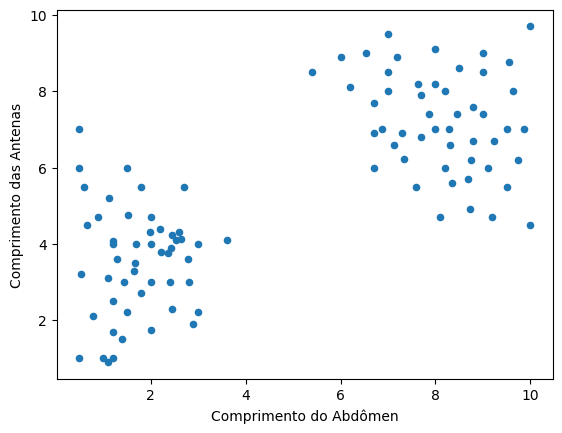

In [ ]:
dados.plot.scatter(x="Comprimento do Abdômen", y="Comprimento das Antenas")

**insights**: claramente há dois grupos distintos: um grupo está com comprimento de abdômen grande e antenas maiores (esperanças), outro grupo tem comprimento de abdômen pequeno e antenas menores (gafanhoto). Esse gráfico confirma o q foi mostrado no describe (mean).

##Modelo de ML

In [ ]:
#pra importar todas as funções do sklearn:

from sklearn import *

In [ ]:
#pra importar só ferramentas específicas:

from sklearn.model_selection import train_test_split

In [ ]:
x = dados[["Comprimento do Abdômen", "Comprimento das Antenas"]]
y = dados["Espécie"]

In [ ]:
#obs: comando stratify faz o balanceamento da qtde de amostras, ex: nesse caso, se vc não colocar, ele pode mostrar mais dados do gafanhoto do q das esperanças.
#obs2: comando random_state é meio que um "embaralhamento" da base com base em qq número q vc escolher
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#escolha do model knn: classifica com base na distância dos dados vizinhos (ex: distância euclidiana). É como se o algoritmo olhasse aquele scatterplot e classificasse o inseto com base na posição dele lá:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#KNeighborsClassifier() é uma função do python q já tem toda a lógica "embutida"

#cria o modelo:

modelo_classificador = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#treina a amostra:

modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#dando valores aleatórios de comprimento de abdomen e antenas pra ver se o modelo consegue prever o tipo de inseto:
modelo_classificador.predict([[8, 6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

com base nos valores de comprimento de antenas e de abdomen dados, 8 e 6, o modelo prevê que esse inseto é uma esperança, e, ao olhar o scatterplot lá em cima com os dados, a previsão faz sentido

In [ ]:
#use o modelo classificador pra criar df com novas previsões de espécies (y_predito) baseado no comprimento de abdomen e antenas da base teste (x_test)
y_predito = modelo_classificador.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#avaliar a acurácia do modelo. Compare y_test (espécies) que já sabemos com y_predito que criamos pra ver o quanto o modelo conseguiu prever:

accuracy_score(y_true = y_test, y_pred = y_predito)

1.0

modelo conseguiu prever com 100% de acurácia, normalmente isso não é bom, pq indica q o modelo "decorou" a base de dados, está viciado.

#Aula 2 - KNN e SVM

**Objetivo**: achar os melhores indicadores pra contratar pessoas  - recrutamento preditivo - People Analytics

##Análise de dados

In [30]:
import pandas as pd

In [31]:
dados = pd.read_excel("Recrutamento.xlsx")
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


base que tem diversas características das pessoas e tem uma coluna de se as pessoas foram contratadas ou não (status) - isso indica modelo de classificação

In [32]:
dados.shape

(215, 15)

In [33]:
#como ver tudo o que tem em uma variável:

set(dados.status)

{'No', 'Yes'}

In [34]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [35]:
#analisar valores nulos de forma visual - biblioteca Missingno

import missingno as msno

<Axes: >

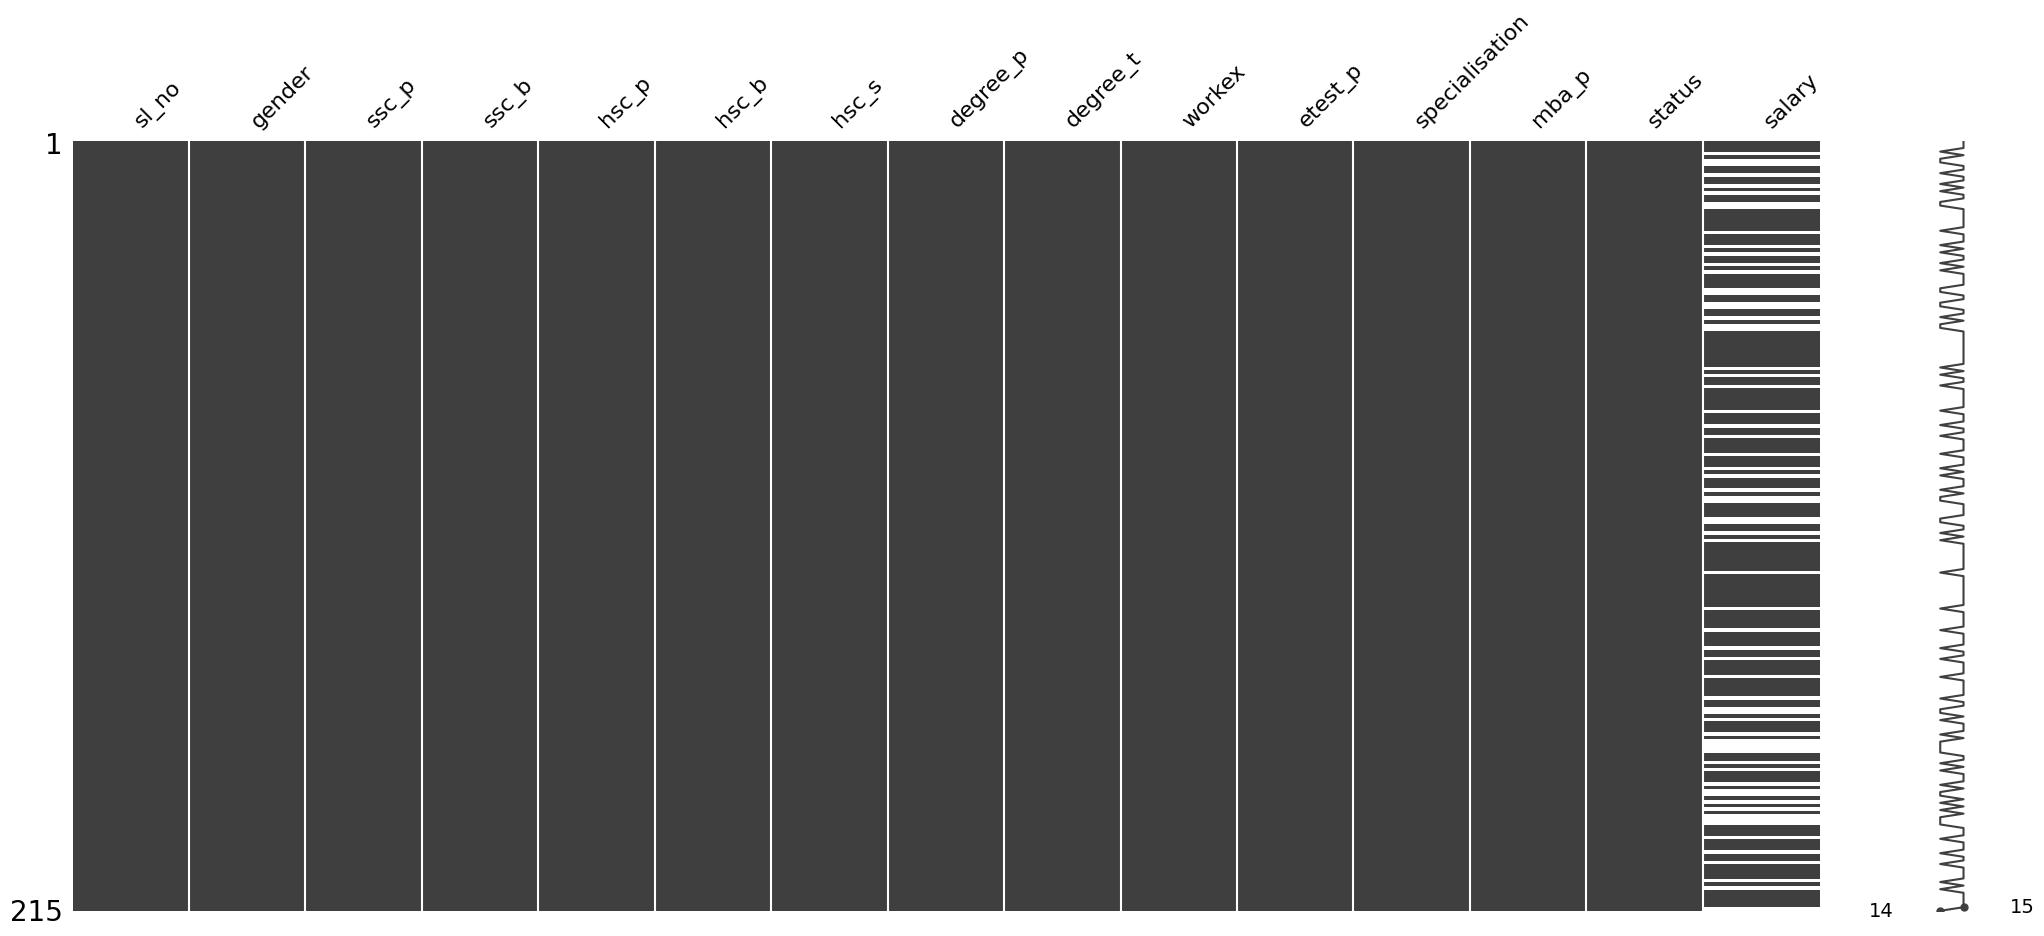

In [36]:
msno.matrix(dados)

In [37]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [38]:
import seaborn as sb

<Axes: xlabel='status', ylabel='salary'>

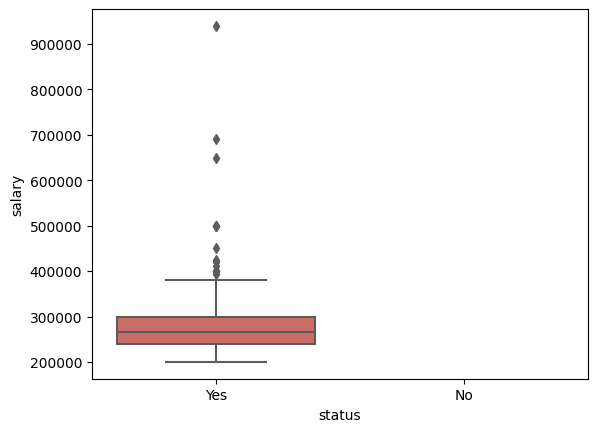

In [39]:
#fazer boxplot pra analisar salário vs status, pq há mtos nulos em salary

sb.boxplot(x="status", y="salary", data=dados, palette="hls")

Nesse gráfico percebemos que não há registros de salários pra No, somente pra pessoas q foram contratadas (Yes) e presumimos que não é salário prévio, mas sim o salário oferecido pra vaga.

In [40]:
#filtrar valores nulos e preencher com zero:

dados["salary"].fillna(value=0, inplace=True)

In [41]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

##Gráficos

<Axes: xlabel='hsc_p'>

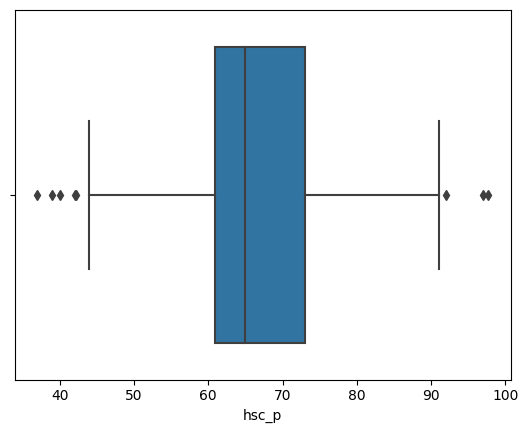

In [42]:
#analisar comportamento da variável hsc_p:

sb.boxplot(x=dados["hsc_p"])

<Axes: xlabel='hsc_p', ylabel='Count'>

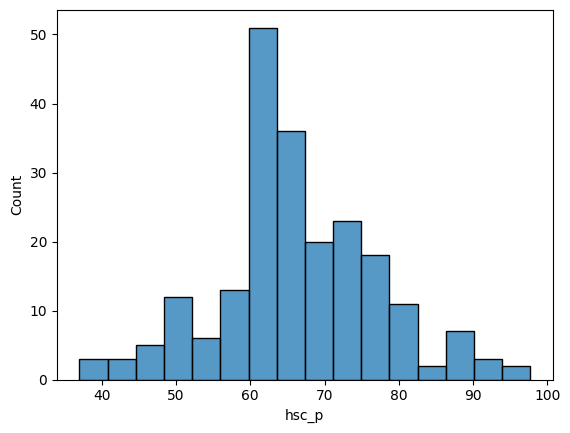

In [43]:
#analisar comportamento da variável hsc_p:

sb.histplot(data=dados, x="hsc_p")

<Axes: xlabel='degree_p'>

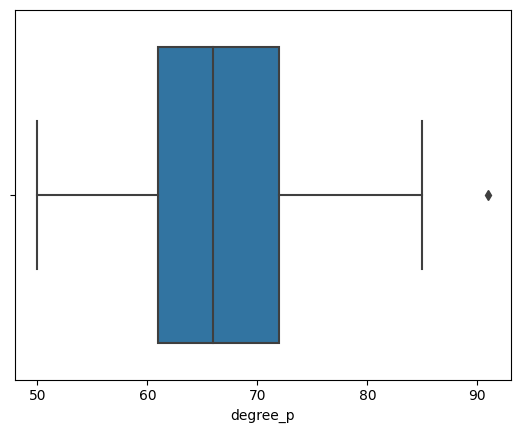

In [44]:
#analisar comportamento da variável degree_p:

sb.boxplot(x=dados["degree_p"])

<Axes: xlabel='degree_p', ylabel='Count'>

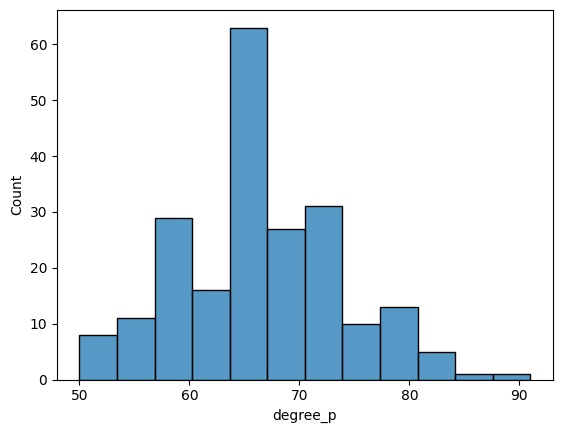

In [45]:
#analisar comportamento da variável degree_p:

sb.histplot(data=dados, x="degree_p")

<Axes: xlabel='etest_p'>

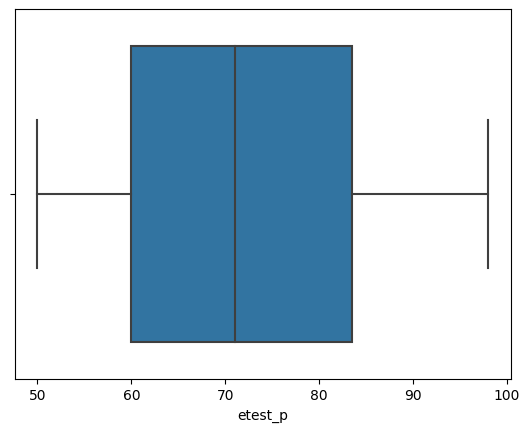

In [46]:
#analisar comportamento da variável etest_p:

sb.boxplot(x=dados["etest_p"])

<Axes: xlabel='mba_p'>

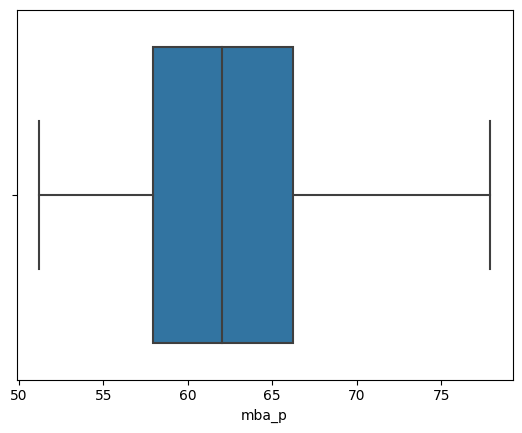

In [47]:
#analisar comportamento da variável mba_p:

sb.boxplot(x=dados["mba_p"])

<Axes: xlabel='salary'>

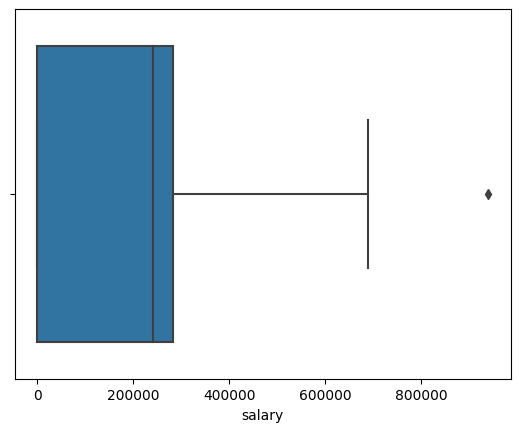

In [48]:
#analisar comportamento da variável salary:

sb.boxplot(x=dados["salary"])

<Axes: xlabel='salary', ylabel='Count'>

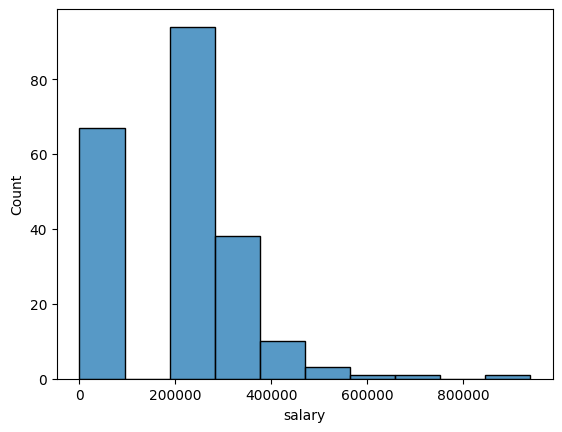

In [49]:
#analisar comportamento da variável salary:

sb.histplot(data=dados, x="salary")

[Text(36.5, 0.5, 'mba_p')]

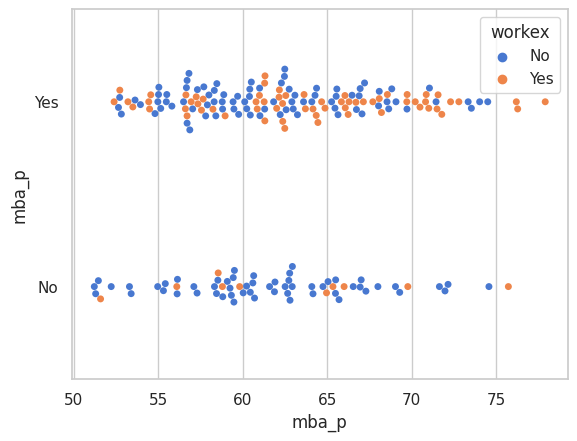

In [50]:
#essa primeira linha é config de estilo
sb.set_theme(style="whitegrid", palette ="muted")

#o nível de estudos influencia na contratação? Gráfico pra verificar:
ax=sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel="mba_p")

In [51]:
#usar plotly:
#o Plotly mostra dados de forma dinâmica, como se fosse PBI do Python:
! pip install plotly_express

In [52]:
import plotly_express as px

In [53]:
#existe algum viés de genero pra oferecer salário? Montar gráfico:

px.violin(dados, y="salary", x="specialisation", color="gender", box=True, points="all")

plotly monta gráfico com caract diferentes: por cor mostra o gênero, gráfico de violino junto com boxplot, qdo passa mouse dá pra ver os dados. Dá pra perceber q masculino em mkt e fin ganha mais msm.  

##Correlação e preprocessing

In [54]:
import matplotlib.pyplot as plt

<ipython-input-55-127267a919ea>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

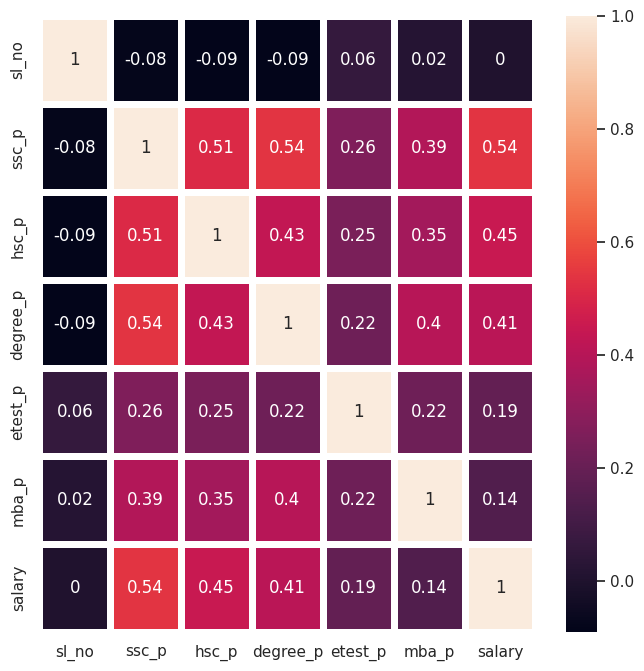

In [55]:
correlation_matriz = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8, 8))

sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
#transformar variáveis str em num. Iniciar com variáveis binárias:
#label encoding é boa pra binários:

colunas = ["gender", "workex", "specialisation", "status"]

label_encoder = LabelEncoder()
for col in colunas:
  dados[col] = label_encoder.fit_transform(dados[col])

In [58]:
#transformar variáveis str em num. Variáveis com mais opções (não binárias):

dummy_hsc_s = pd.get_dummies(dados["hsc_s"], prefix="dummy")
dummy_degree_t = pd.get_dummies(dados["degree_t"], prefix="dummy")

#concatenar o nosso dataframe com as variáveis dummy e cria um novo df
dados_dummy = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)


In [59]:
dados_dummy

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,1,59.43,0,0.0,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,0,...,0,74.49,1,400000.0,0,1,0,1,0,0
211,212,1,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,0,...,0,53.62,1,275000.0,0,0,1,0,0,1
212,213,1,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,1,...,0,69.72,1,295000.0,0,1,0,1,0,0
213,214,0,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,0,...,1,60.23,1,204000.0,0,1,0,1,0,0


hot encoding cria novas colunas com as variáveis que precisamos, que são de texto, mas não são só binários

In [60]:
#dropar colunas q não serão necessárias:

dados_dummy.drop(["hsc_s", "degree_t", "salary"], axis=1, inplace=True)

<ipython-input-61-1d620759e35f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

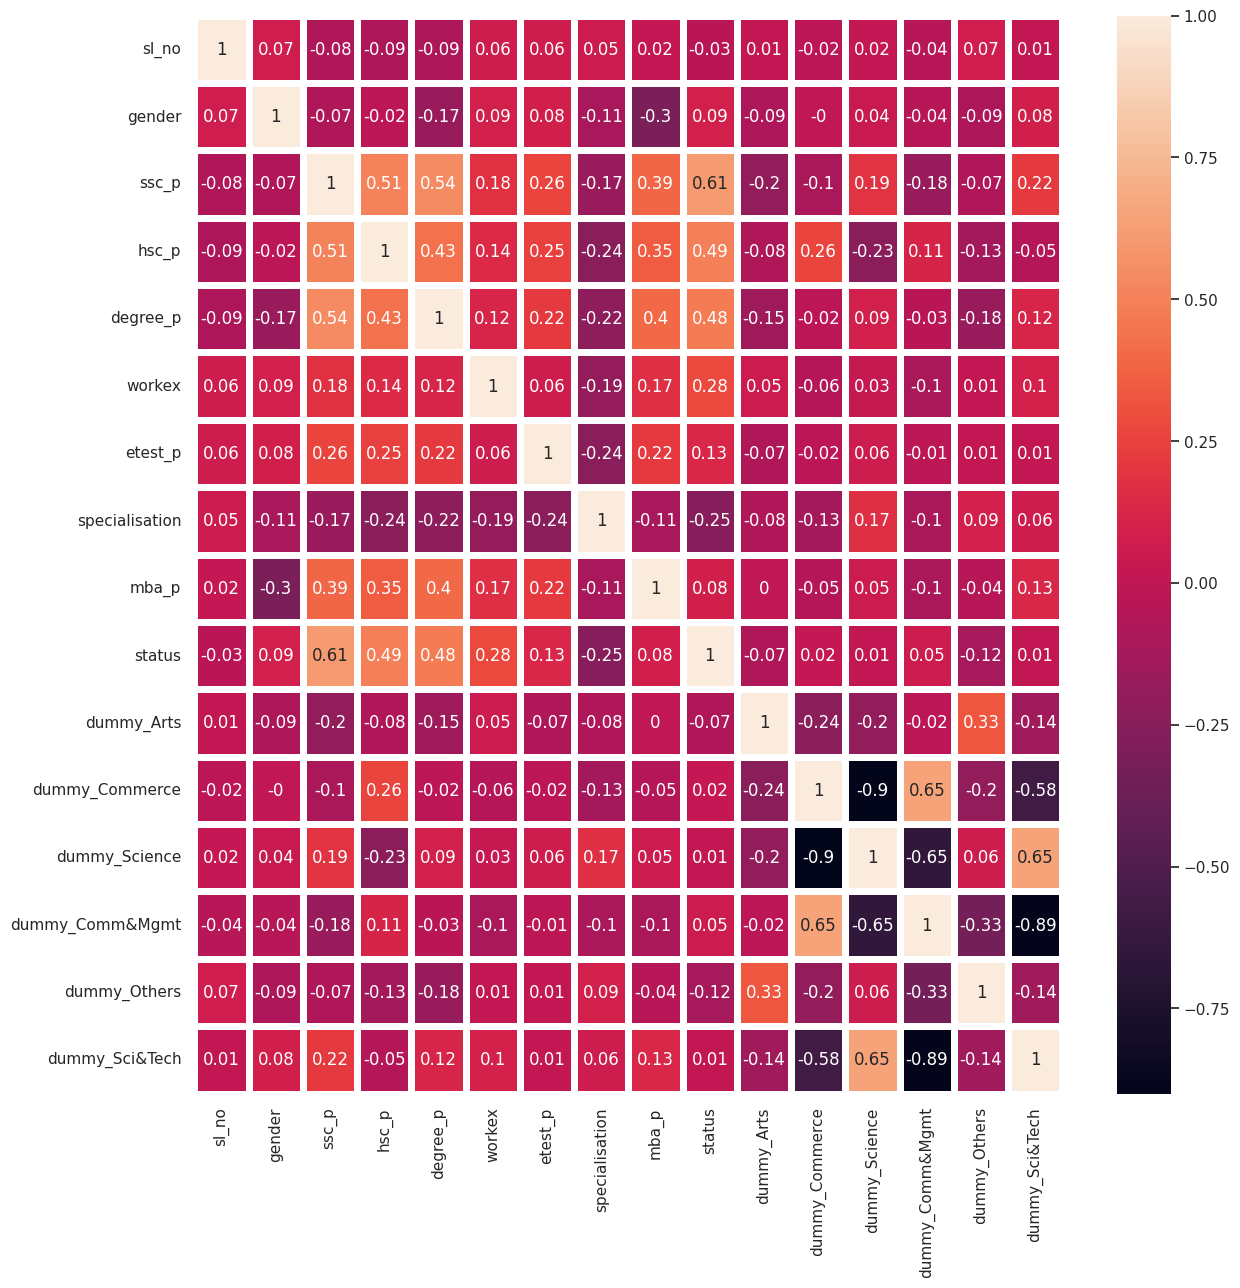

In [61]:
correlation_matriz = dados_dummy.corr().round(2)

fig, ax = plt.subplots(figsize=(14, 14))

sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)


##Modelos ML

In [62]:
x = dados_dummy[["ssc_p", "hsc_p", "degree_p", "workex", "mba_p"]]
y = dados_dummy["status"]

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [65]:
#ver a variável x pra saber se tem a msm escala ou não. Nesse caso, não tem, precisamos padronizar.
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [67]:
#StandardScaler usa z score pra escalonar os dados:

scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [68]:
import numpy as np

In [69]:
#cálculo de diferença de erro pra achar um range de "k" mais adequados:
#cria lista e função pra saber qual k é melhor:

error = []
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_escalonado, y_train)
  pred_i = knn.predict(x_test_escalonado)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'erro médio')

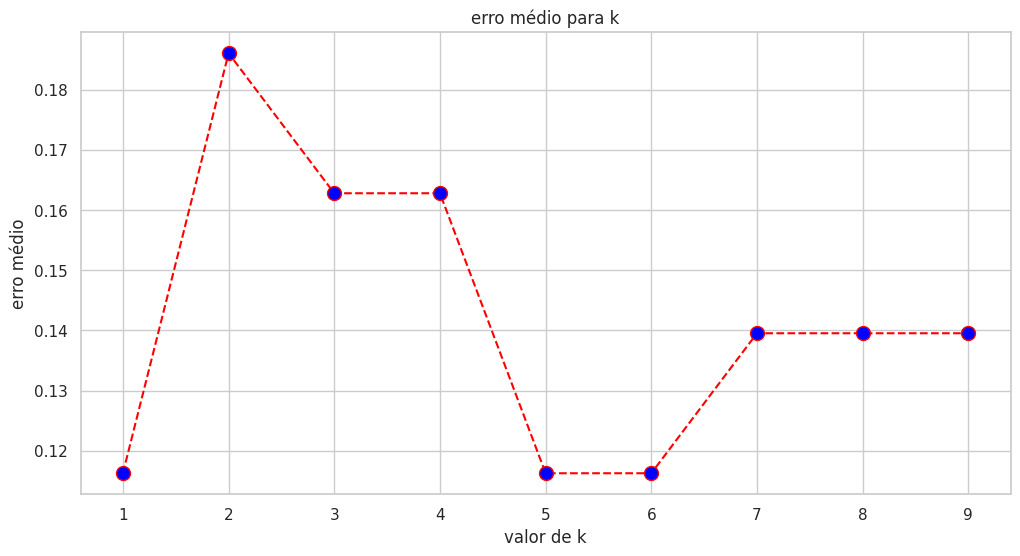

In [70]:
#criar gráfico pra ver essa função acima e escolher o valor melhor de k:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("erro médio para k")
plt.xlabel("valor de k")
plt.ylabel("erro médio")

**insights**: esse gráfico é feito pra encontrar o melhor valor de k, nesse caso, qto menor o erro, melhor, logo, poderíamos usar o número de neighbors 1, 5 e 6. É melhor usar 5 e 6 pq não faz mto sentido usar um vizinho só pra analisar. Idealmente usar números ímpares pra não ter impate, logo, o ideal é 5.

In [71]:
#criar modelo KNN com o k escolhido (5):

modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
#avaliando o modelo:

print(accuracy_score(y_test, y_predito))

0.8837209302325582


In [74]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [75]:
#criando modelo SVM:

SVM = Pipeline(
    [
        ("Linear_svc", LinearSVC(C=1))
    ]
  )

In [76]:
#treinando o SVM:

SVM.fit(x_train_escalonado, y_train)

Pipeline(steps=[('Linear_svc', LinearSVC(C=1))])

In [77]:
y_predito_svm = SVM.predict(x_test_escalonado)

In [78]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


#Aula 3 - KMEANS (o vídeo 3 parece incompleto, vi pelo notebook pra assistir as outras aulas)

base de shopping pra segmentação de clientes - será q esses clientes tem algo em comum? podem ser agrupados por características comuns?

##Análise exploratória

In [ ]:
dados.shape

(200, 6)

In [ ]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Grupos                    0
dtype: int64

In [ ]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Grupos
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,2.005000
std,57.879185,13.969007,26.264721,25.823522,1.717476
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,4.000000
max,200.000000,70.000000,137.000000,99.000000,5.000000


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>],
       [<Axes: title={'center': 'Grupos'}>, <Axes: >]], dtype=object)

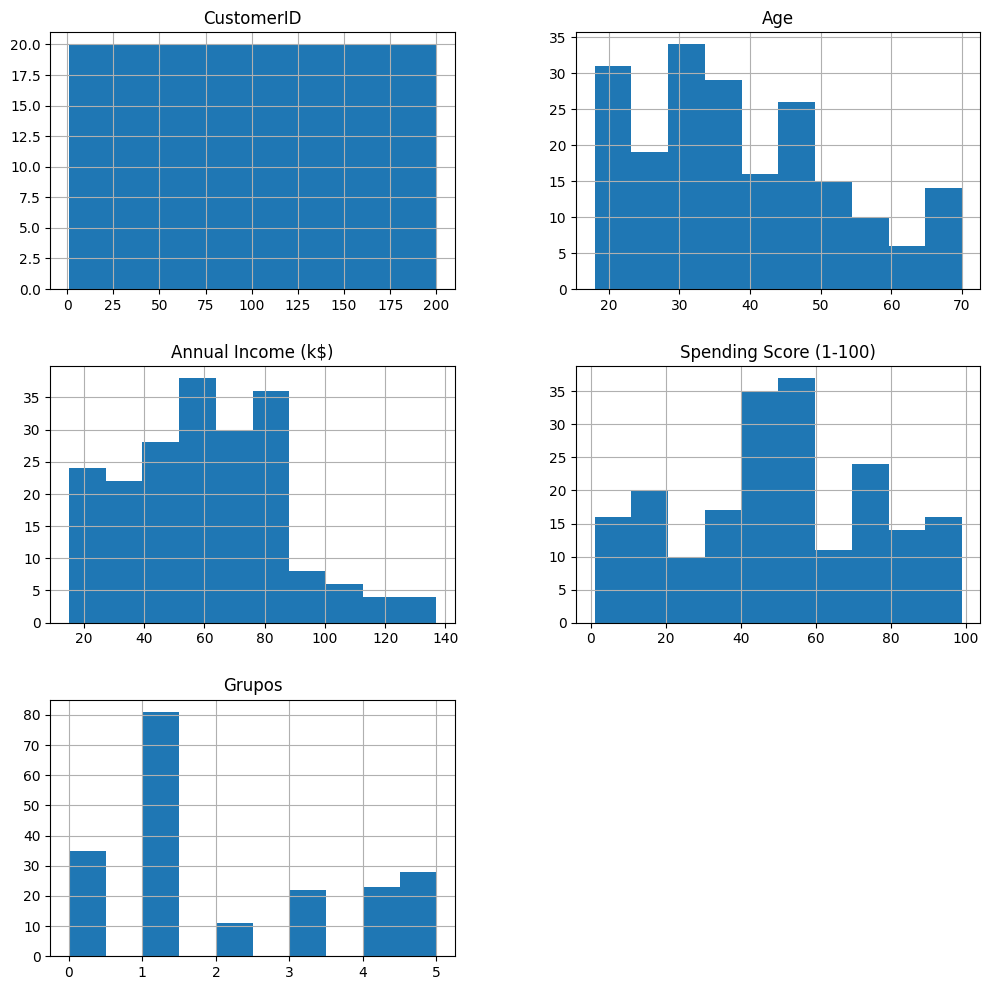

In [ ]:
#fazer histograma de todas as variáveis de uma vez:.

dados.hist(figsize=(12, 12))

<Axes: >

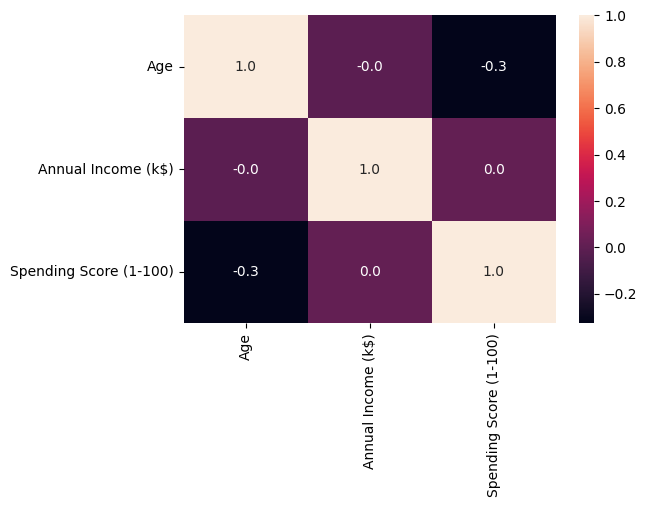

In [ ]:
#fazer a correlação dos dados:

plt.figure(figsize=(6, 4))

sns.heatmap(dados[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr(method='pearson'), annot=True, fmt=".1f")

In [ ]:
#outra forma de contar os dados:

dados["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

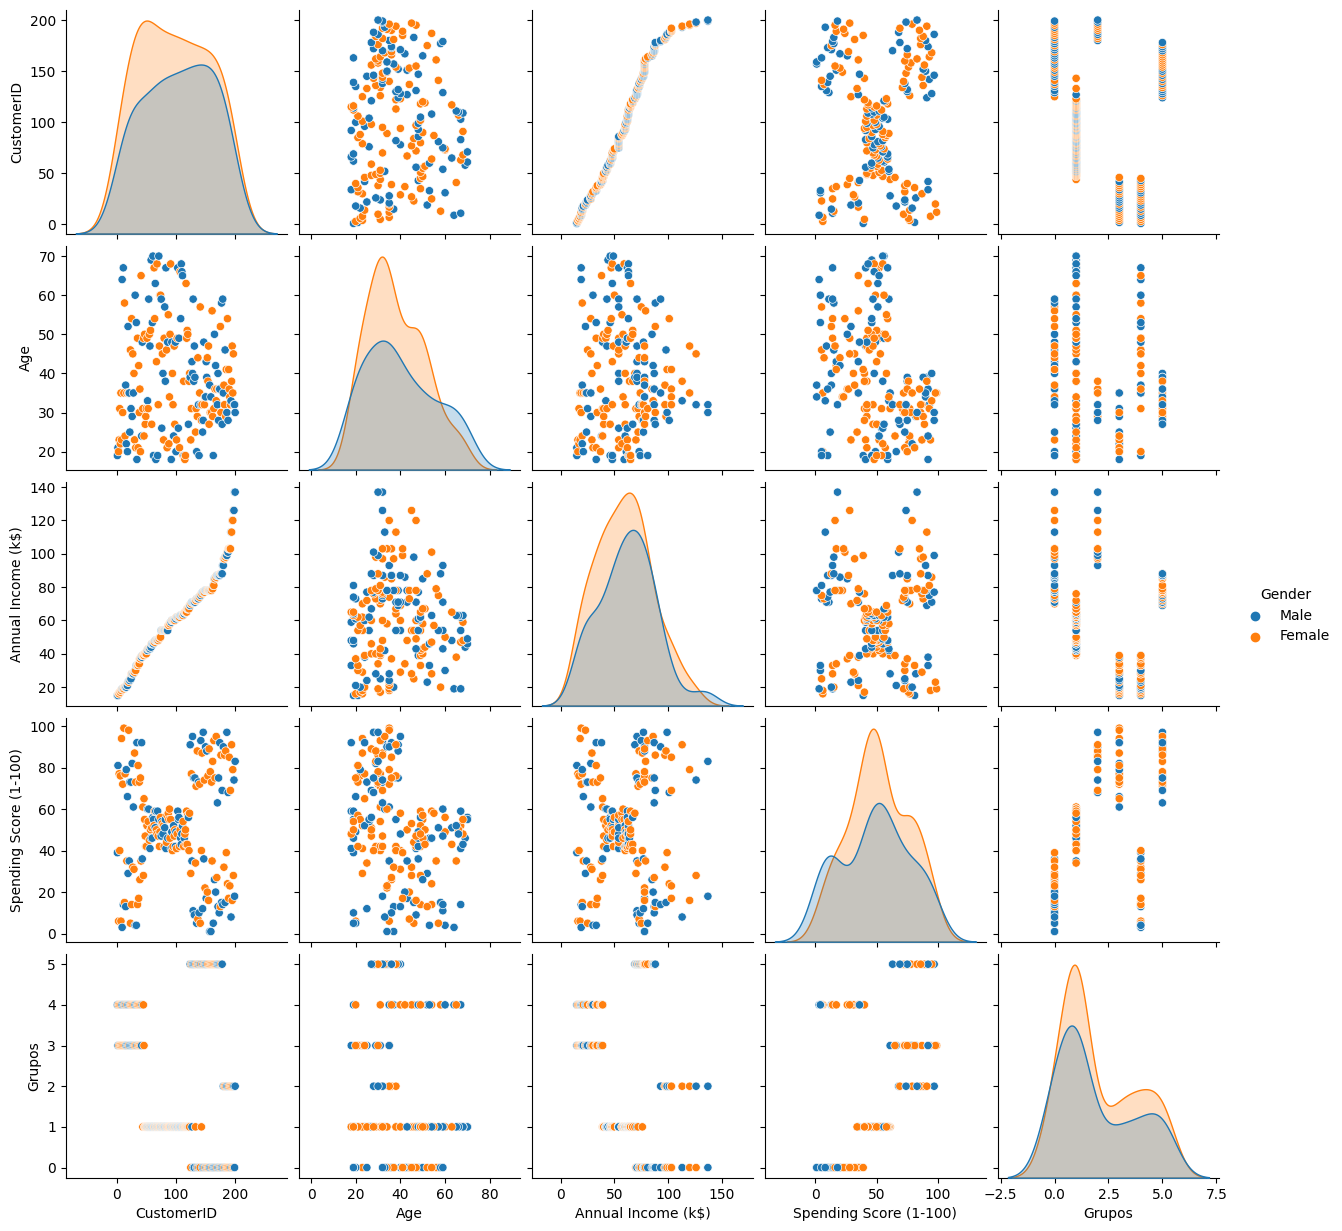

In [ ]:
  #analisar todas as variáveis com cores diferentes pra gender e as relações entre elas:
  #gráficos mto legais!

sns.pairplot(dados, hue="Gender")
plt.show()

**insights**: annual income e spending score estão formando quase um X no scatterplot, que parece dividir os dados em grupos. Usá-las no modelo.

In [ ]:
import pandas as pd

#plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

#algoritmos de agrupamento
from sklearn.cluster import KMeans, DBSCAN

#avaliação de desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [ ]:
dados = pd.read_csv("mall.csv", sep=",")

##Feature Scaling

In [ ]:
#verificar a necessidade de padronização ou normalização dos dados:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()

#scaler = MinMaxScaler()

scaler.fit(dados[["Annual Income (k$)", "Spending Score (1-100)"]])

StandardScaler()

In [ ]:
dados_Escalonados = scaler.transform(dados[["Annual Income (k$)", "Spending Score (1-100)"]])
dados_Escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

##Criando os agrupamentos (cluster) - KMEANS

In [ ]:
#definindo o modelo de clusterização. K-Means com 6 clusters.
kmeans = KMeans(n_clusters=6, random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans_escalonados = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados_Escalonados)

#Salvando os centroides de cada cluster
centroides_escalonados = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonado = kmeans.predict(dados_Escalonados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dados_Escalonados = pd.DataFrame(dados_Escalonados, columns = ['Annual Income (k$)','Spending Score (1-100)'])


In [ ]:
dados_Escalonados.head()


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
dados_Escalonados['Grupos'] = kmeans_labels_escalonado
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100),Grupos
0,-1.738999,-0.434801,5
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,5
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,5


In [ ]:
dados['Grupos'] = kmeans_labels
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
pd.Series(kmeans_labels).value_counts()


1    81
0    35
5    28
4    23
3    22
2    11
dtype: int64

In [ ]:
centroides #espaço tridimensional (salário e score de gasto)


array([[ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [108.18181818,  82.72727273],
       [ 25.72727273,  79.36363636],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714]])

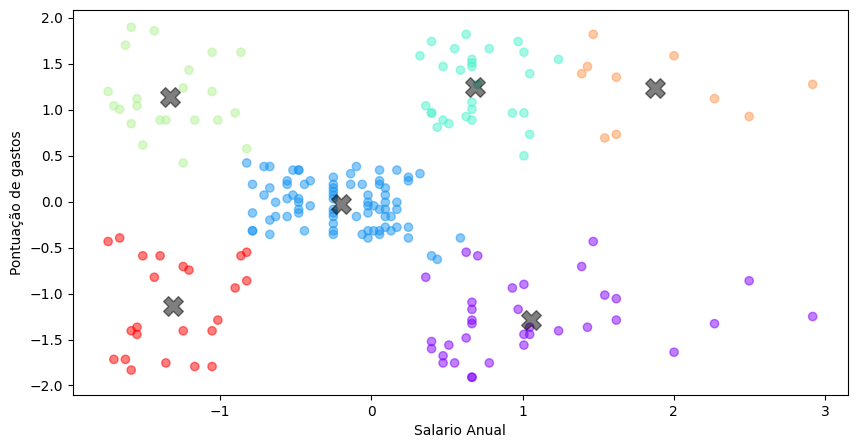

In [ ]:
#CLUSTERS COM FEATURE SCALING
# plotando os dados identificando com os seus clusters
plt.scatter(dados_Escalonados[['Annual Income (k$)']],dados_Escalonados[['Spending Score (1-100)']], c=kmeans_labels_escalonado, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

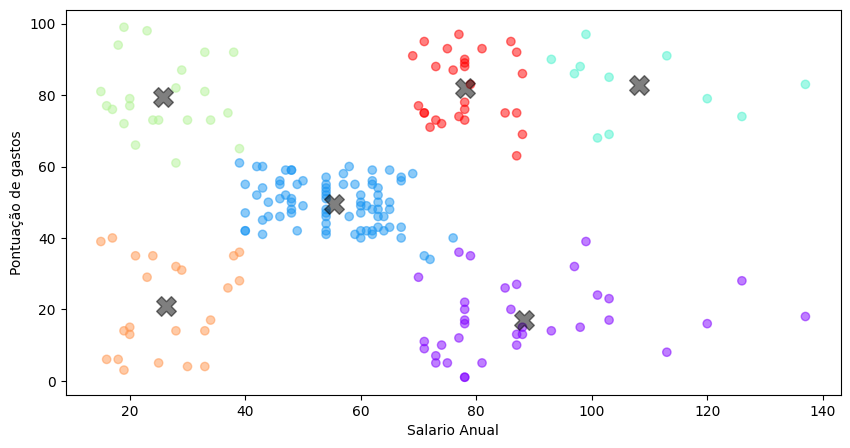

In [ ]:
#CLUSTERS SEM FEATURE SCALING
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

**insights**: comportamento dos dados com e sem scaling tá mto parecido

In [ ]:
#como encontrar melhor valor de k com método "elbow":
#lista com qtde de clusters que iremos testar:

k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

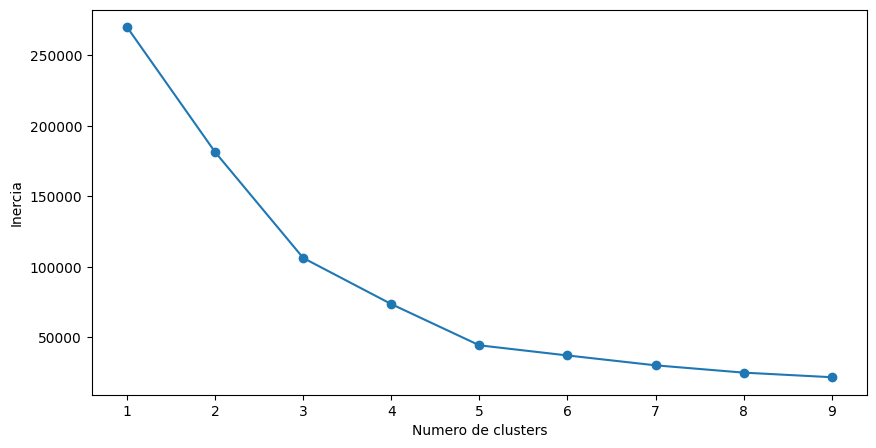

In [ ]:
#armazena o SSE pra cada qtde de k:
sse = []

#roda o k-means pra cada k fornecido:
for i in k:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])
  sse.append(kmeans.inertia_) #cálculo do erro do kmeans, inserir na lista vazia q criamos acima

plt.rcParams["figure.figsize"] = (10, 5)
#plota o gráfico com a soma dos erros:
plt.plot(k, sse, "-o")
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")
plt.show()

**insights**: menor centro q poderia estar usando com os dados - k=5, pq o erro foi menor que o 3 e o 4. Lembrando q qdo olhamos os gráficos lá atrás parecia que tinha 5 grupos.

In [ ]:
#análise dos dados agrupados:
dados.groupby("Grupos")["Age"].mean()

Grupos
0    41.114286
1    42.716049
2    32.454545
3    25.272727
4    45.217391
5    32.785714
Name: Age, dtype: float64

In [ ]:
#análise dos dados agrupados:
dados.groupby("Grupos")["Annual Income (k$)"].mean()

Grupos
0     88.200000
1     55.296296
2    108.181818
3     25.727273
4     26.304348
5     78.035714
Name: Annual Income (k$), dtype: float64

In [ ]:
#checando os dados pra 5 clusters:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

#salvando os centroides de cada cluster:
centroides = kmeans.cluster_centers_

kmeans_labels = kmeans.predict(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


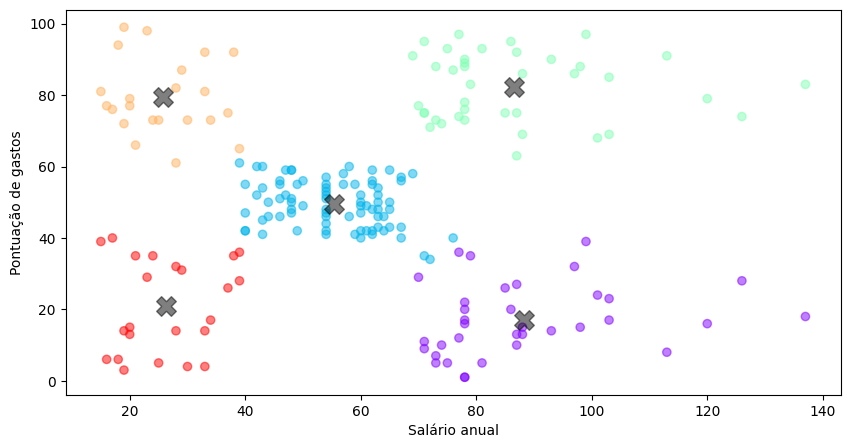

In [ ]:
plt.scatter(dados[['Annual Income (k$)']], dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap="rainbow")
plt.xlabel("Salário anual")
plt.ylabel("Pontuação de gastos")
#plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c="black", marker="X", s=200, alpha=0.5)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

In [ ]:
#cria dataframe separado pro pessoal do grupo 1:
dados_grupo_1 = dados[dados["Grupos"] == 1]
dados_grupo_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
43,44,Female,31,39,61,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1
...,...,...,...,...,...,...
121,122,Female,38,67,40,1
122,123,Female,40,69,58,1
126,127,Male,43,71,35,1
132,133,Female,25,72,34,1


In [ ]:
#cria dataframe separado pro pessoal do grupo 2:
dados_grupo_2 = dados[dados["Grupos"] == 2]
dados_grupo_2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
179,180,Male,35,93,90,2
181,182,Female,32,97,86,2
183,184,Female,29,98,88,2
185,186,Male,30,99,97,2
187,188,Male,28,101,68,2
189,190,Female,36,103,85,2
191,192,Female,32,103,69,2
193,194,Female,38,113,91,2
195,196,Female,35,120,79,2
197,198,Male,32,126,74,2


In [ ]:
#cria dataframe separado pro pessoal do grupo 3:
dados_grupo_3 = dados[dados["Grupos"] == 3]
dados_grupo_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [ ]:
#cria dataframe separado pro pessoal do grupo 4:
dados_grupo_4 = dados[dados["Grupos"] == 4]
dados_grupo_4

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
12,13,Female,58,20,15,4
14,15,Male,37,20,13,4
16,17,Female,35,21,35,4
18,19,Male,52,23,29,4


##DBSCAN

In [ ]:
#criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)

#ajustando os dados:
dbscan.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

#salva as labels geradas pelo dbscan
dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

labels como -1 são classificados como outliers. Como ele trabalha com densidade dos dados, ele considerou os dados mais afastados como outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

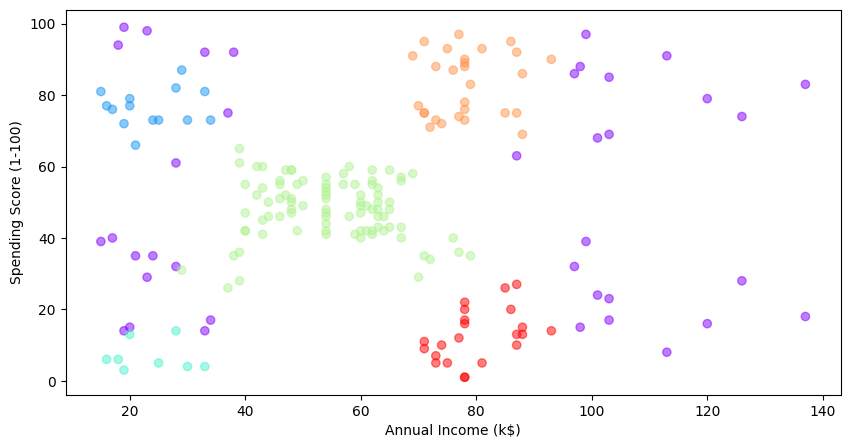

In [ ]:

plt.scatter(dados[['Annual Income (k$)']], dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show

pontinhos roxos são outliers. **Nesse caso, talvez esse algoritmo não faça sentido** pq alguns dos dados q foram classificados como outliers estão mto próximos dos grupos. Além disso, tirou mtos dados da nossa base pequena. Porém, ele confirmou a teoria de que os dados podem ser difividos em 5 grupos, pq no kmeans, nós passamos o parâmetro 5 com base no elbow, mas no dbscan, ele sozinho já dividiu em 5.

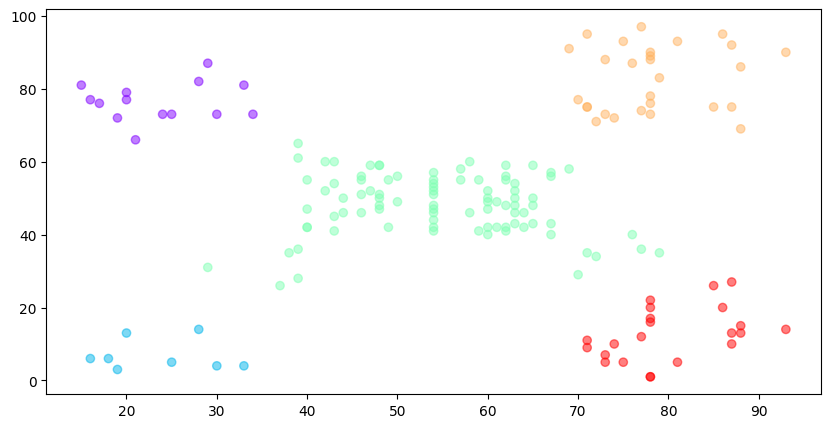

In [ ]:
#plotando o gráfico sem os outliers:
#mascara para outlier:
mascara = dbscan_labels>=0

plt.scatter(dados[['Annual Income (k$)']][mascara], dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap="rainbow")

##Métricas de validação

In [ ]:
#Tipo externo - Adjusted Rand Index (se der perto de 0, é sinal de que não estão próximos)
adjusted_rand_score(kmeans_labels, dbscan_labels)

0.7151933782093212

In [ ]:
#Tipo interno - Silhouette
#se der próximo a -1, clusters ruins, se der próximo a 1, clusters bem separados

In [ ]:
#Silhouette KMEANS:
silhouette_score(dados[["Annual Income (k$)", "Spending Score (1-100)"]], kmeans_labels)

0.553931997444648

In [ ]:
#Silhouette DBSCAN:
silhouette_score(dados[["Annual Income (k$)", "Spending Score (1-100)"]], dbscan_labels)

0.36328873885121793

##KMEANS pra segmentar imagem

**Segmentação de imagem:** colorir da msm cor objetos ou partes de interesse

**Objetivo desse dataset**: identificar câncer em mamografias

In [ ]:
#para processar arquivos e imagens:
from PIL import Image
import glob
import numpy as np
#obs: a gente usa o numpy pq a imagem é como se fosse uma matriz de pixels

#para plotar imagens:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#agrupamento:
from sklearn.cluster import KMeans

In [ ]:
#carregando as imagens:
img_G = mpimg.imread("mdb001.pgm") #Tipo G
img_D = mpimg.imread("mdb003.pgm") #Tipo D
img_F = mpimg.imread("mdb005.pgm") #Tipo F

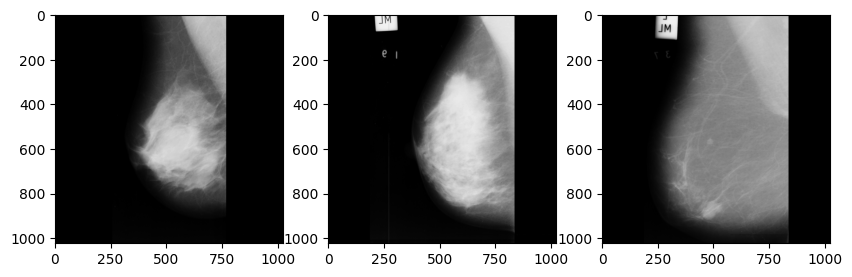

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap="gray", vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap="gray", vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap="gray", vmin=0, vmax=255)
plt.show()

In [ ]:
#essa função usa o kmeans como filtro de segmentação de imagem:
def filtro_kmeans(img, clusters):
  vectorized = img.reshape((-1, 1))
  kmeans = KMeans(n_clusters=clusters,  random_state=0, n_init=5)
  kmeans.fit(vectorized)

  centers = np.uint8(kmeans.cluster_centers_)
  segmented_data = centers[kmeans.labels_.flatten()]

  segmented_image = segmented_data.reshape((img.shape))
  return(segmented_image)

In [ ]:
clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters)
img_D_segmentada = filtro_kmeans(img_D, clusters)
img_F_segmentada = filtro_kmeans(img_F, clusters)

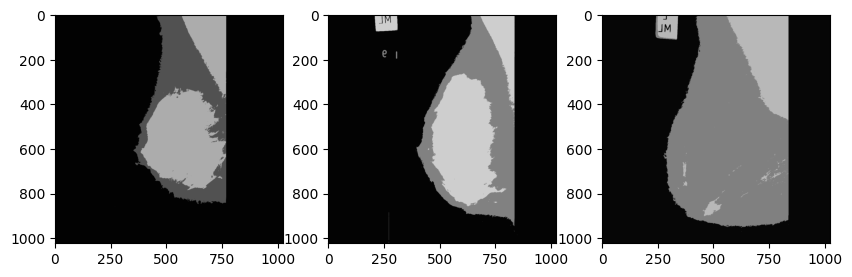

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G_segmentada, cmap="gray", vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmentada, cmap="gray", vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap="gray", vmin=0, vmax=255)
plt.show()

#Aula 4 - Modelos Baseados em Árvores (parece que falta vídeo 1)


**OBS: TEM OUTRA BASE DE DADOS DISPONÍVEL E NOTEBOOK OFICIAL DA AULA COM OUTRAS CARACTERÍSTICAS, DÁ PRA USAR PRA TREINAR**

##Análise exploratória

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [5]:
#subindo a base de dados
dados = pd.read_csv("card_transdata.csv", sep=",")

In [6]:
dados.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
dados.isnull().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
#limpando dados nulos
dados = dados.dropna()

In [9]:
dados.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<Axes: >

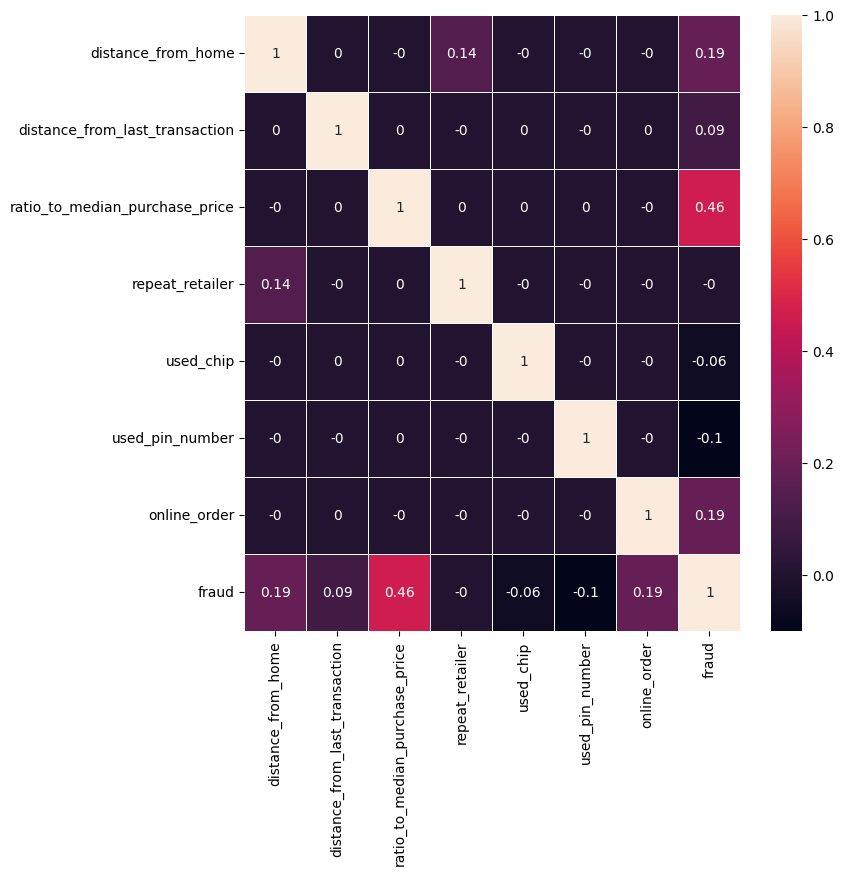

In [10]:
#analisando correlações
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

##Montando o modelo - Decision Tree

In [11]:
#Separando os dados
x = dados.drop(columns=['fraud'])
y = dados['fraud'] #O que eu quero prever. (Target)

In [12]:
#Separando em bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [13]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth = 2)

In [14]:
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [15]:
y_predito = dt.predict(x_test)


[Text(0.5, 0.8333333333333334, 'x[2] <= 4.0\nentropy = 0.428\nsamples = 800000\nvalue = [730078, 69922]'),
 Text(0.25, 0.5, 'x[0] <= 100.004\nentropy = 0.169\nsamples = 717444\nvalue = [699473, 17971]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.052\nsamples = 681683\nvalue = [677647, 4036]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.965\nsamples = 35761\nvalue = [21826, 13935]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\nentropy = 0.951\nsamples = 82556\nvalue = [30605, 51951]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.541\nsamples = 29007\nvalue = [25406, 3601]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.46\nsamples = 53549\nvalue = [5199, 48350]')]

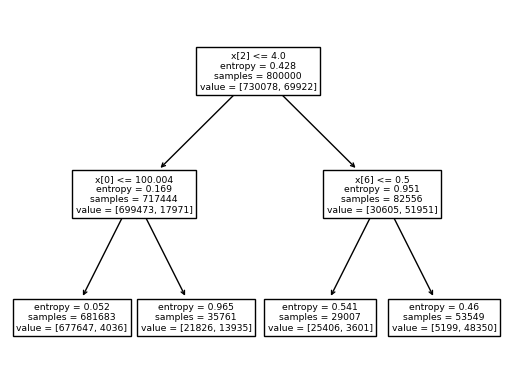

In [16]:
#plotar a árvore de decisão:
tree.plot_tree(dt)

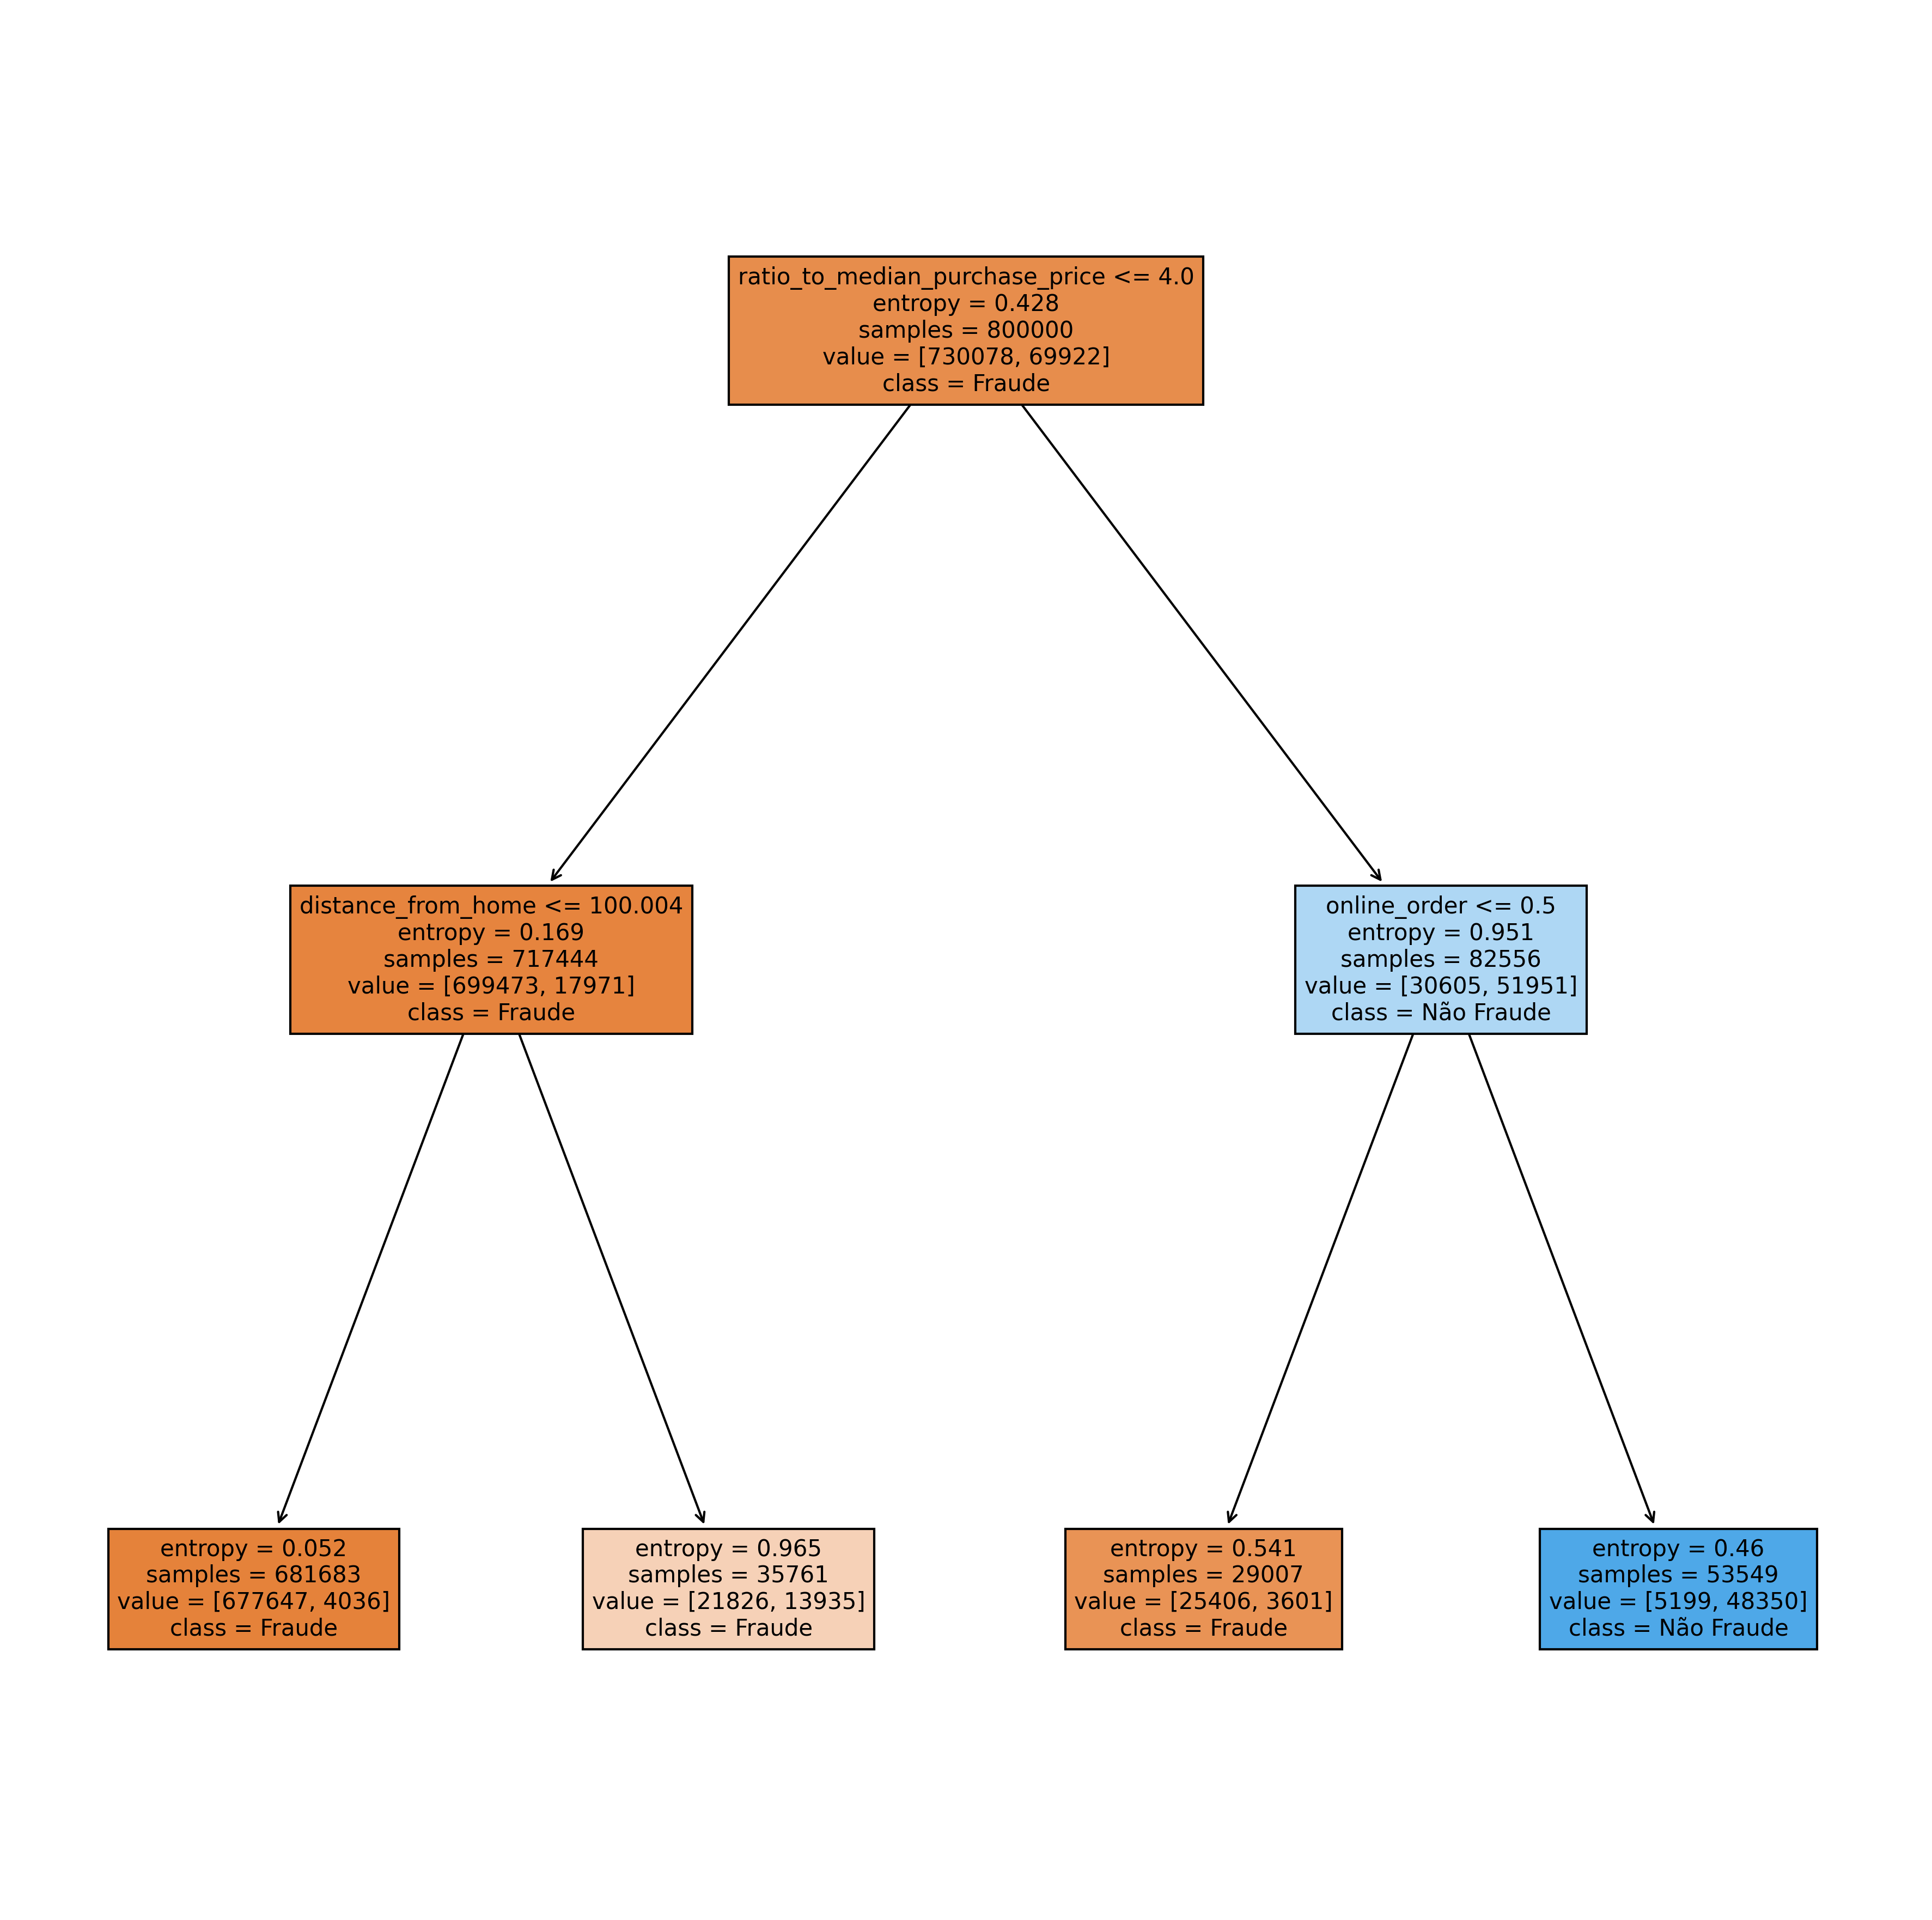

In [17]:
#colocar algumas infos pra gerar a msm árvore de cima, mas com maior entendimento:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

tree.plot_tree(dt,
               feature_names = label_names,
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

**insights**: começou analisando ratio_to_median_purchase_price (se a média de preço gasto é <=4). Com entropia de 0.42 e numero de samples, o maior resultado daquela caixinha foi Fraude. Seguir a análise dessa forma. Ver q cores tb mudam (laranjinha é fraude, mas há laranja claro. Azul é não fraude, mas tem azul mais claro tb)

In [18]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.96675


##Montando o modelo - Random Forest

In [19]:
#modelo mais robusto, custo computacional maior do q árvore comum (decision tree):

rf = RandomForestClassifier(n_estimators=5, max_depth = 2,  random_state=7)

rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [20]:
estimator = rf.estimators_


In [21]:
y_predito_random_forest = rf.predict(x_test)


In [22]:
# Metricas de precisão, f1-score e acurácia.
print(accuracy_score(y_test, y_predito_random_forest)) #relatório de validação das métricas de desempenho.

0.95339


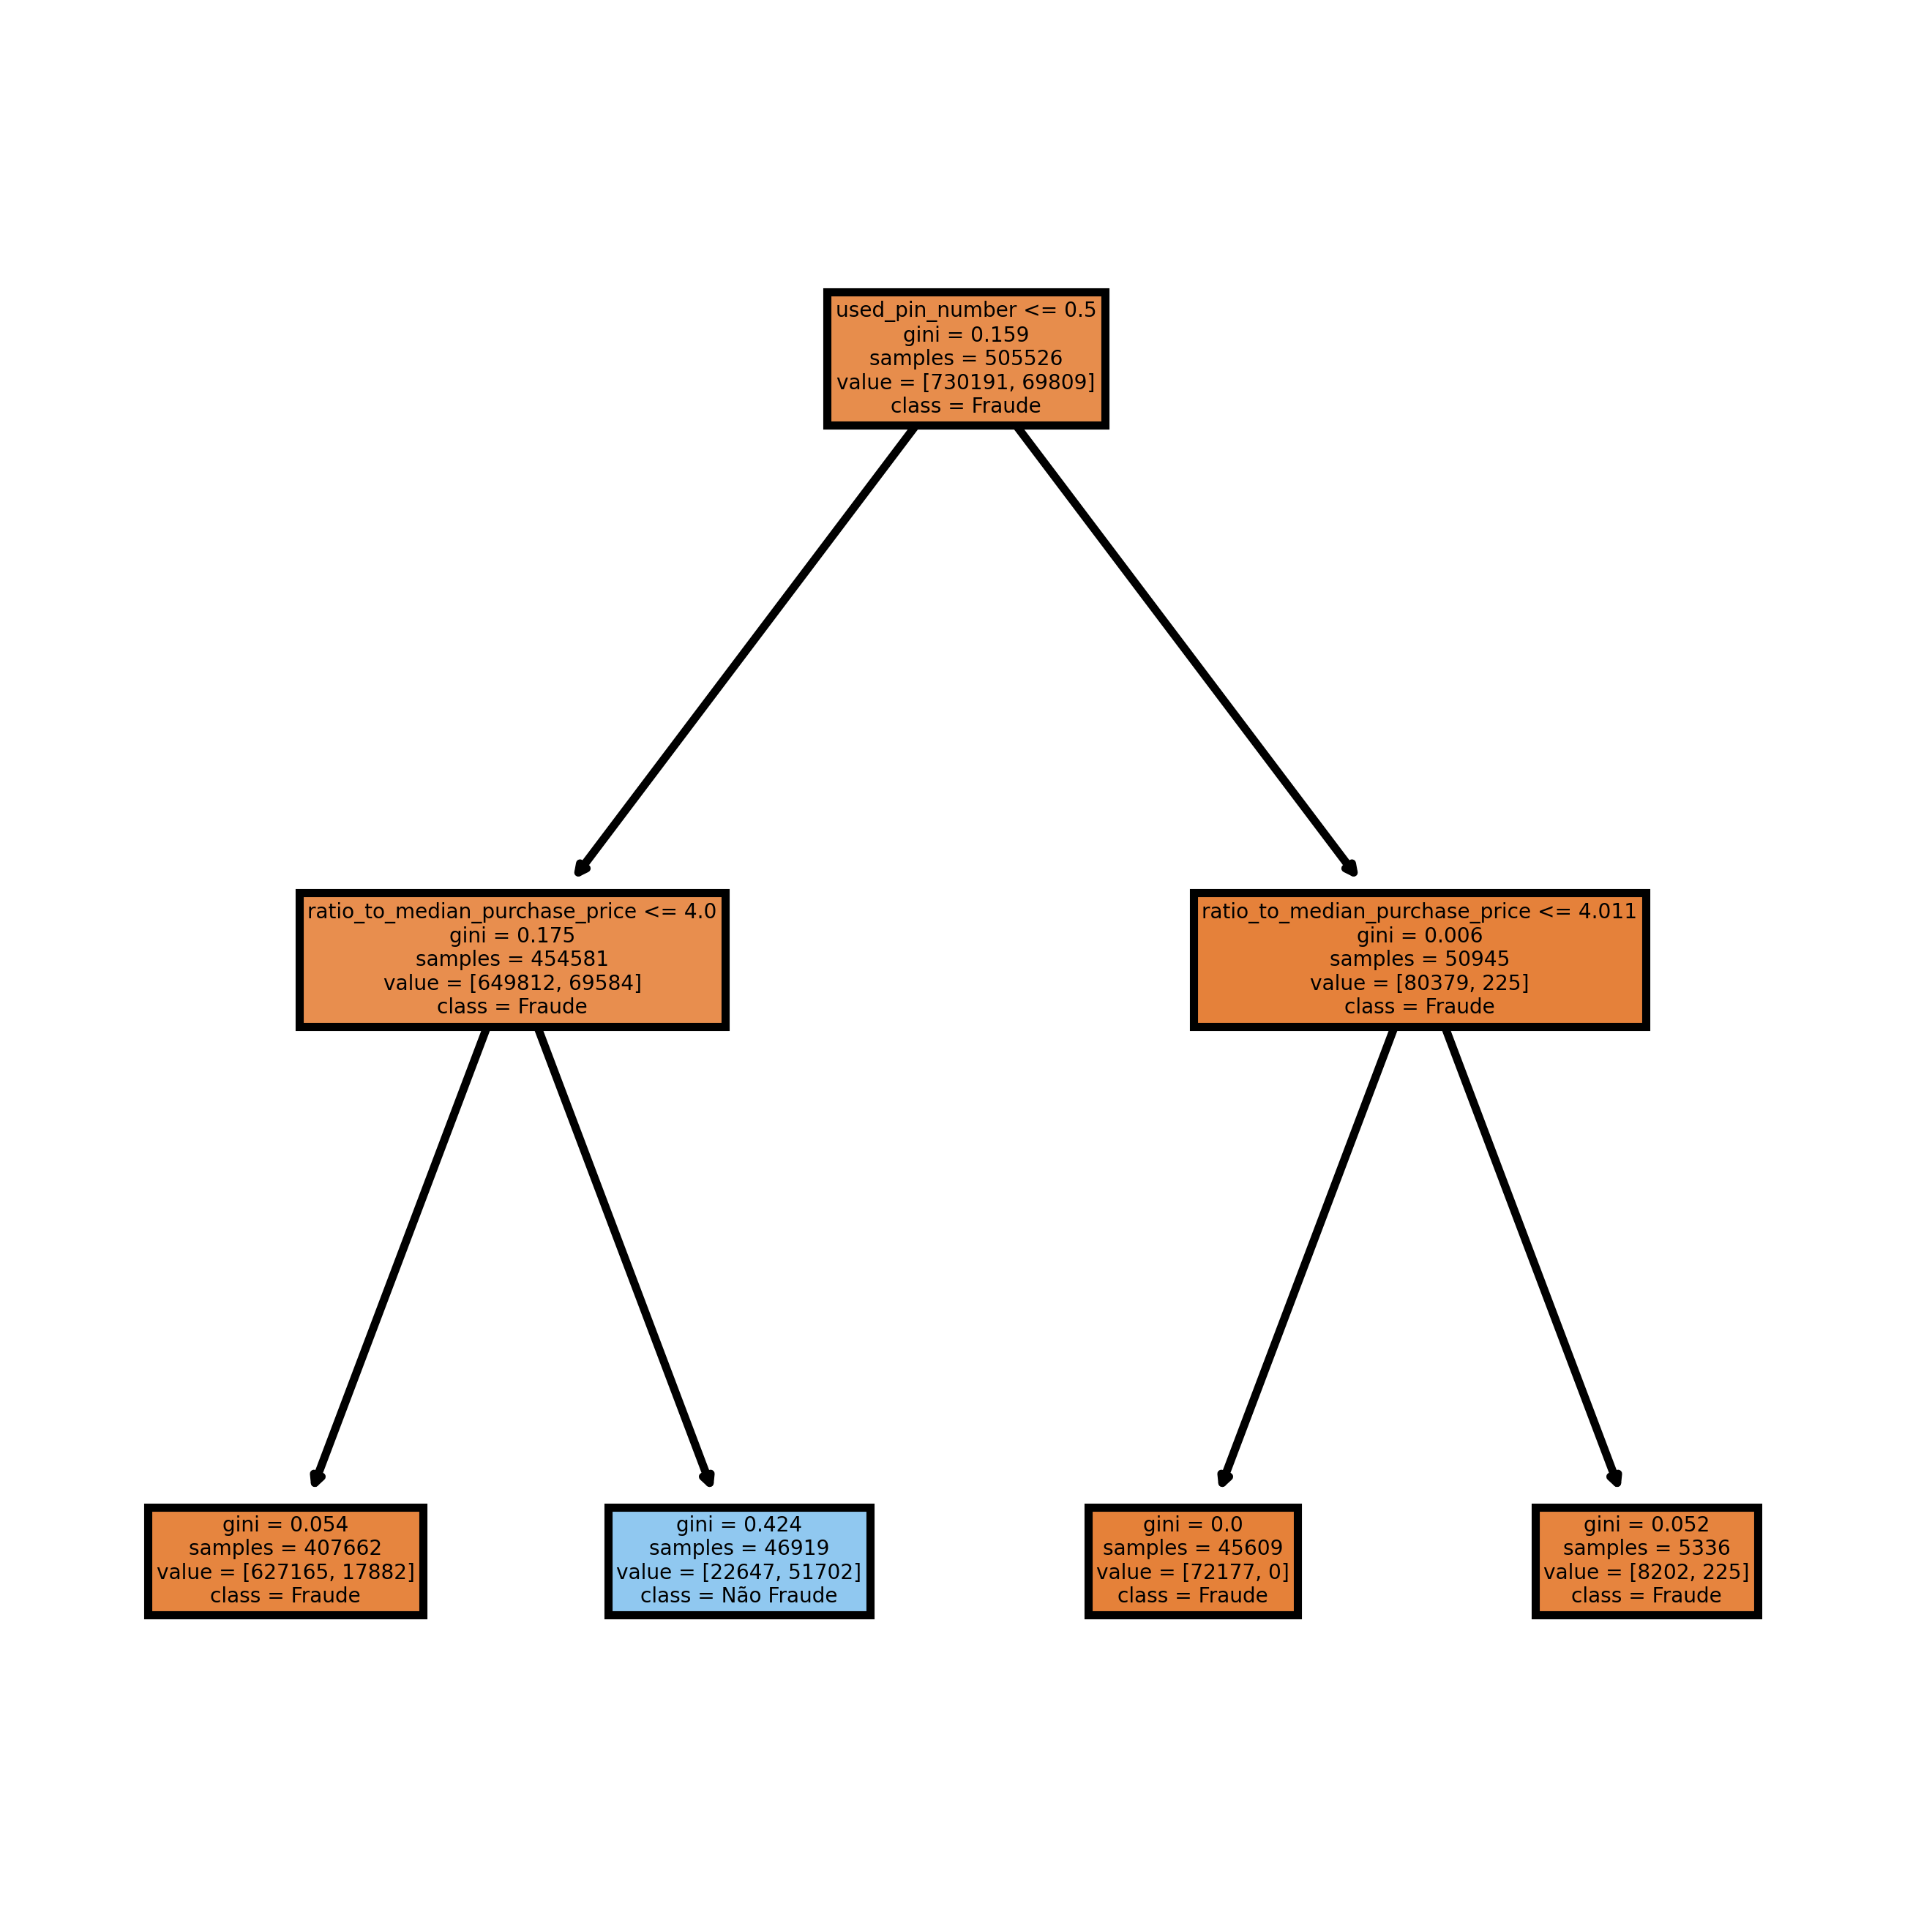

In [23]:
#plotar árvores geradas
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = label_names,
               class_names=class_names,
               filled = True);
fig.savefig('rf_individualtree.png')

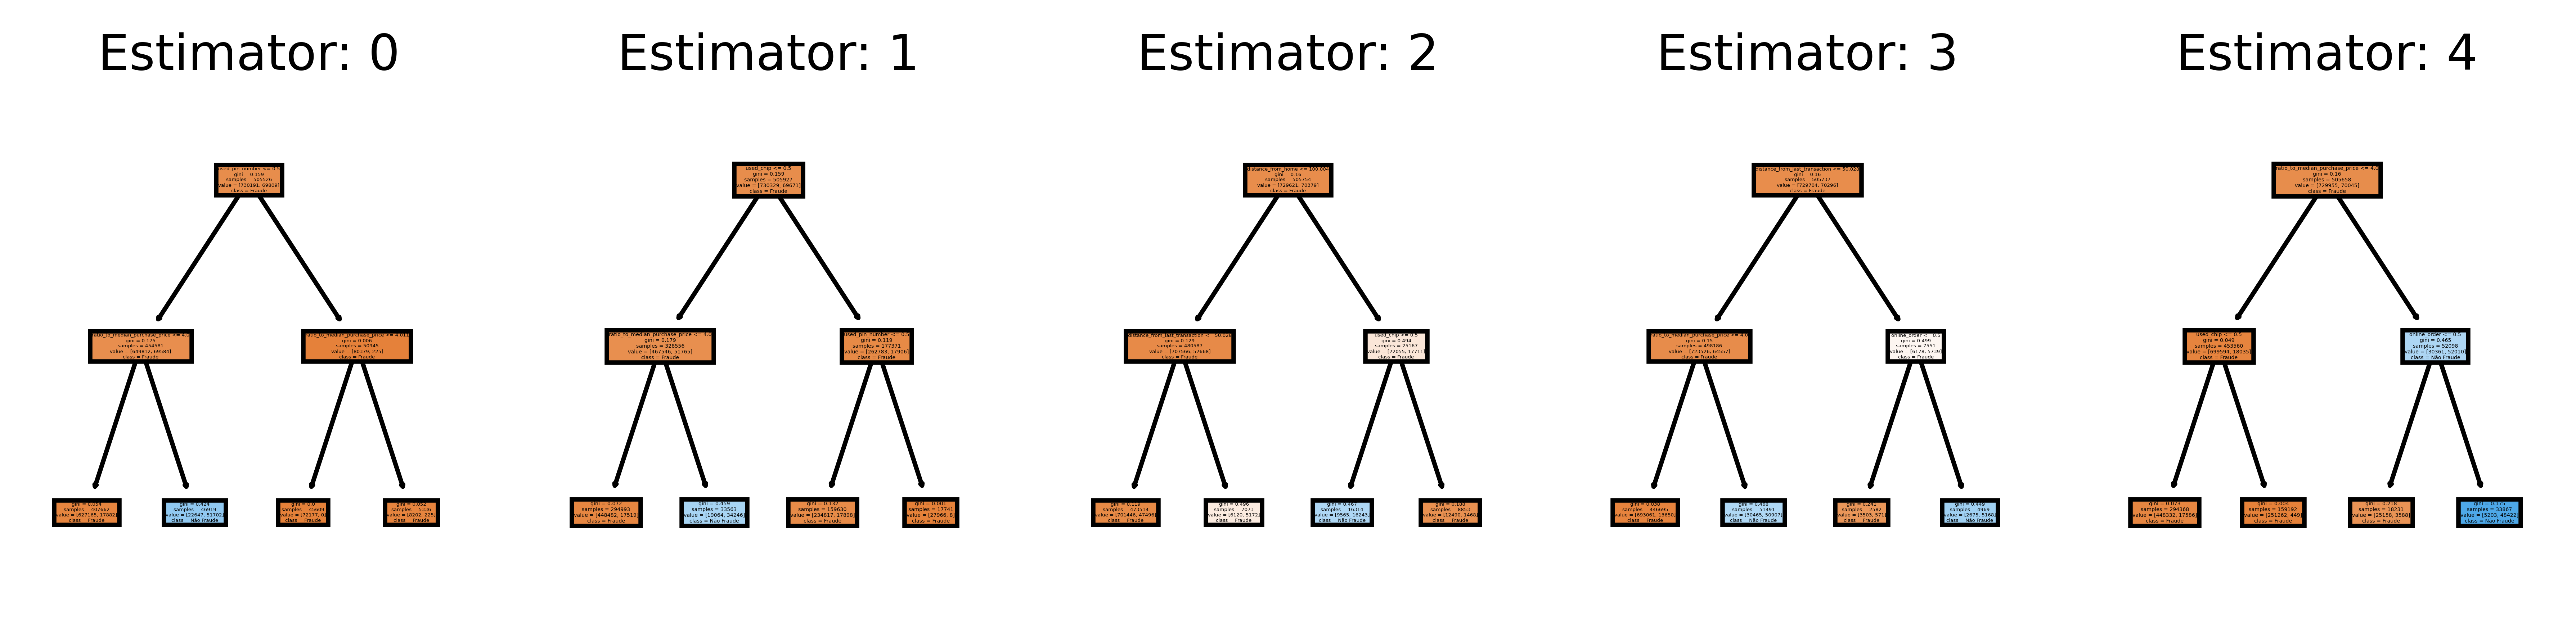

In [24]:
#plotar todas as árvores geradas:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = label_names,
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [25]:
#score é a precisão média de todas as árvores:
print (rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.95321875
0.95339


**Obs**: é preciso verificar tb se os dados estão balanceados, por ex: se tivesse 800 linhas, e 700 delas fosse fraude e somente 100 fossem não fraude, a chance de o modelo classificar novos dados como fraude é mto maior.

#Aula 5 - Validação Cruzada

**OBS: FAZER DEPOIS A ANÁLISE DA BASE DE DADOS CONFORME O NOTEBOOK OFICIAL DA AULA PRA PODER USAR O K-FOLD COMO NO VÍDEO**

#Aula 6 - Classification Report e Métricas de Classificação

In [1]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report #métricas de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [2]:
dados = pd.read_csv('card_transdata.csv', sep=',')

Text(70.72222222222221, 0.5, 'Dados Reais')

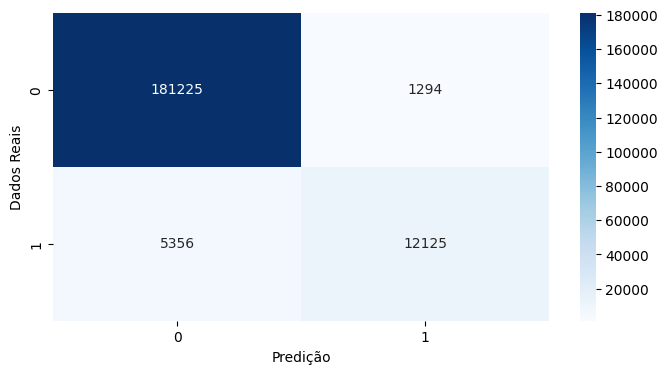

In [26]:
matriz_confusao = confusion_matrix(y_test, y_predito)
plt.figure(figsize=(8, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predição")
plt.ylabel("Dados Reais")

**interpretação:** cruzar linha e coluna com 0 = número de acertos de não fraude (azul escuro). Linha 0 + coluna 1 = número de erros de não fraude (casos q eram não fraude e foram classificados como fraude). Linha 1 + coluna 0 = número de erros de fraude (casos q eram fraude e foram classificados como não fraude). Linha 1 + coluna 1 = número de acertos de fraude (azul claro) . A diagonal da matriz sempre traz o número de acertos.

In [27]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    182519
         1.0       0.90      0.69      0.78     17481

    accuracy                           0.97    200000
   macro avg       0.94      0.84      0.88    200000
weighted avg       0.97      0.97      0.96    200000



**interpretação:** F1 Score  - métrica pra avaliar escopo. é média entre precision e recall. Recall: foco em falso negativo / Precision: foco em falso positivo. Dependendo do contexto, vc precisa focar em um ou em outro. Ex: algoritmo que prevê COVID, é pior ele dizer q a pessoa tem e na verdade ela não tem, ou que ele diga q a pessoa não tem, mas ela tem? Segunda opção, e nesse caso seria relevante focar em análise de recall, nos falsos negativos.

#Aula 7 - AUC Score e ROC Curve

In [29]:
#são métricas de classificação de modelos
#AUC é derivado do ROC


In [79]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [80]:
#armazena as probabilidades
y_prob = modelo_classificador.predict_proba(x_test_escalonado)[:,1]

In [81]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8769230769230769

**interpretação:** entender a sensibilidade do modelo - se der 1, é overfitting, o ideal é ser menos. É uma curva, calcula a área embaixo da curva (AUC - area under curve).

Text(0.5, 0, 'False Positive Rate')

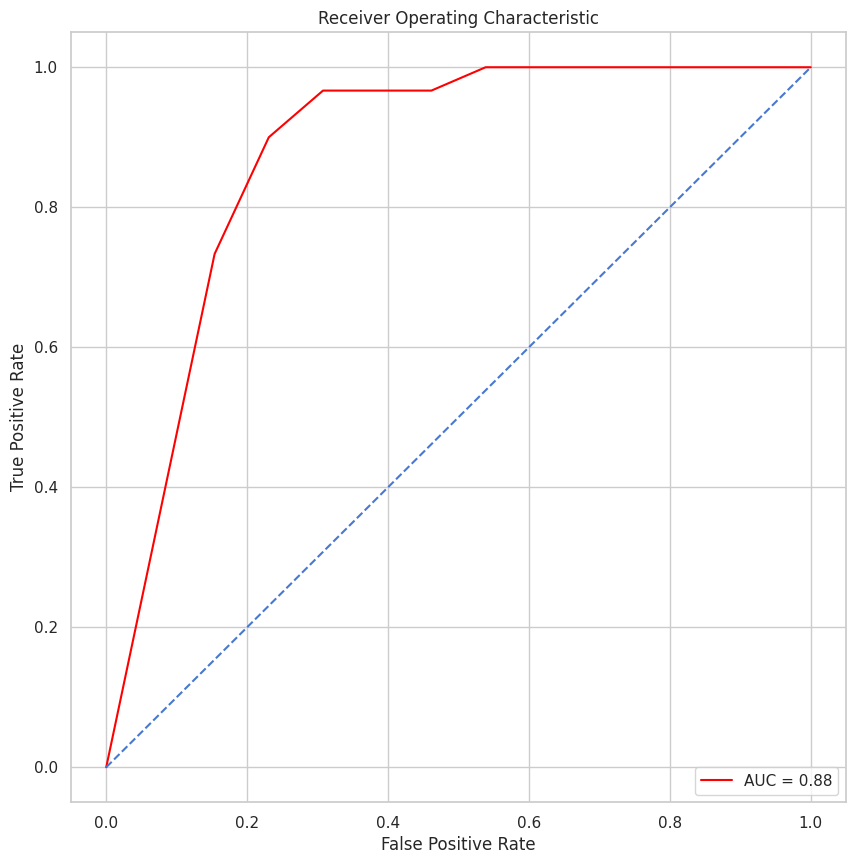

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**interpretação:** se a curva vermelha estiver abaixo da azul, o modelo está ruim.